# Módulo 27: Introducción a Regresión

## Conceptos básicos de regresión
- https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86
- El objetivo final es averiguar los coeficientes óptimos que reduzcan la distancia entre las predicciones y los valores reales
- Puede ser una regresión simple o multivariable
- Esa distancia se llama R2 (Coeficiente de determinación)
- Además, se tiene una serie de premisas que deben respetarse: https://towardsdatascience.com/linear-regression-model-with-python-481c89f0f05b (usando statmodels)
    1. Linearity: The relationship between X and the mean of Y is linear
    2. Normality: The residuals follow a normal distribution and the expected mean of the residuals is zero
    3. Homoscedasticity: The variance of residual is constant for all values of X
    4. No autocorrelation: Residuals are independent from each other
    5. No multicolinearity: Thhere is no high correlation between predictor variables
- Ref: https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

## Descripción de los campos
- price
- area
- bedrooms
- barhrooms
- stories
- mainroad
- guestroom
- basement
- hotwaterheating
- airconditioning
- parking
- prefarea
- furnishingstatus
- En este caso se quiere predecir el costo de la casa

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Housing.csv')
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
93,6300000,7200,3,2,1,yes,no,yes,no,yes,3,no,semi-furnished
41,7840000,6360,3,2,4,yes,no,no,no,yes,0,yes,furnished
280,4270000,6360,2,1,2,yes,no,no,no,no,0,no,unfurnished
531,2233000,5300,3,1,1,no,no,no,no,yes,0,yes,unfurnished
60,7140000,6000,3,2,2,yes,yes,no,no,no,1,no,semi-furnished


# Exploratory Data Analysis

In [2]:
# Revisar para si existen campos nulos
print(f'Existen {df.isnull().sum().sum()} campos nulos en el dataset')

Existen 0 campos nulos en el dataset


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [5]:
# Cambiar el formato gráfico
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [6]:
# Revisar si una columna solamente tiene un valor único para poderlo quitar
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

### Insights
- Se debe cambiar las columnas que tienen valores en cadenas a numeros 1/0
- Se debe cambiar furnishingstatus a 1/2/3
- El dataset no tiene campos en nulo
---

## Feature Engineering

In [7]:
# Cambiar las columnas categóricas (Yes/No) y (True/False) por (1/0)
df['mainroad'] = df['mainroad'].replace({'yes': 1, 'no': 0}, regex=True)
df['guestroom'] = df['guestroom'].replace(to_replace={'yes':1, 'no':2}, regex=True)
df['basement'] = df['basement'].replace(to_replace={'yes': 1, 'no': 0}, regex=True)
df['hotwaterheating'] = df['hotwaterheating'].replace(to_replace={'yes': 1, 'no': 0}, regex=True)
df['airconditioning'] = df['airconditioning'].replace(to_replace={'yes': 1, 'no': 0}, regex=True)
df['prefarea'] = df['prefarea'].replace(to_replace={'yes': 1, 'no': 0}, regex=True)
df['furnishingstatus'] = df['furnishingstatus'].replace(to_replace={'unfurnished': 3, 'semi-furnished': 2, 'furnished': 1}, regex=True)

In [8]:
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
498,2660000,2000,2,1,2,1,2,0,0,0,0,0,2
187,5110000,6100,3,1,1,1,2,1,0,1,0,1,2
110,6090000,6600,3,1,1,1,1,1,0,0,2,1,2
490,2835000,4350,3,1,2,0,2,0,1,0,1,0,3
532,2135000,3000,2,1,1,0,2,0,0,0,0,0,3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


## Análisis de Correlación / Análisis Bivariado

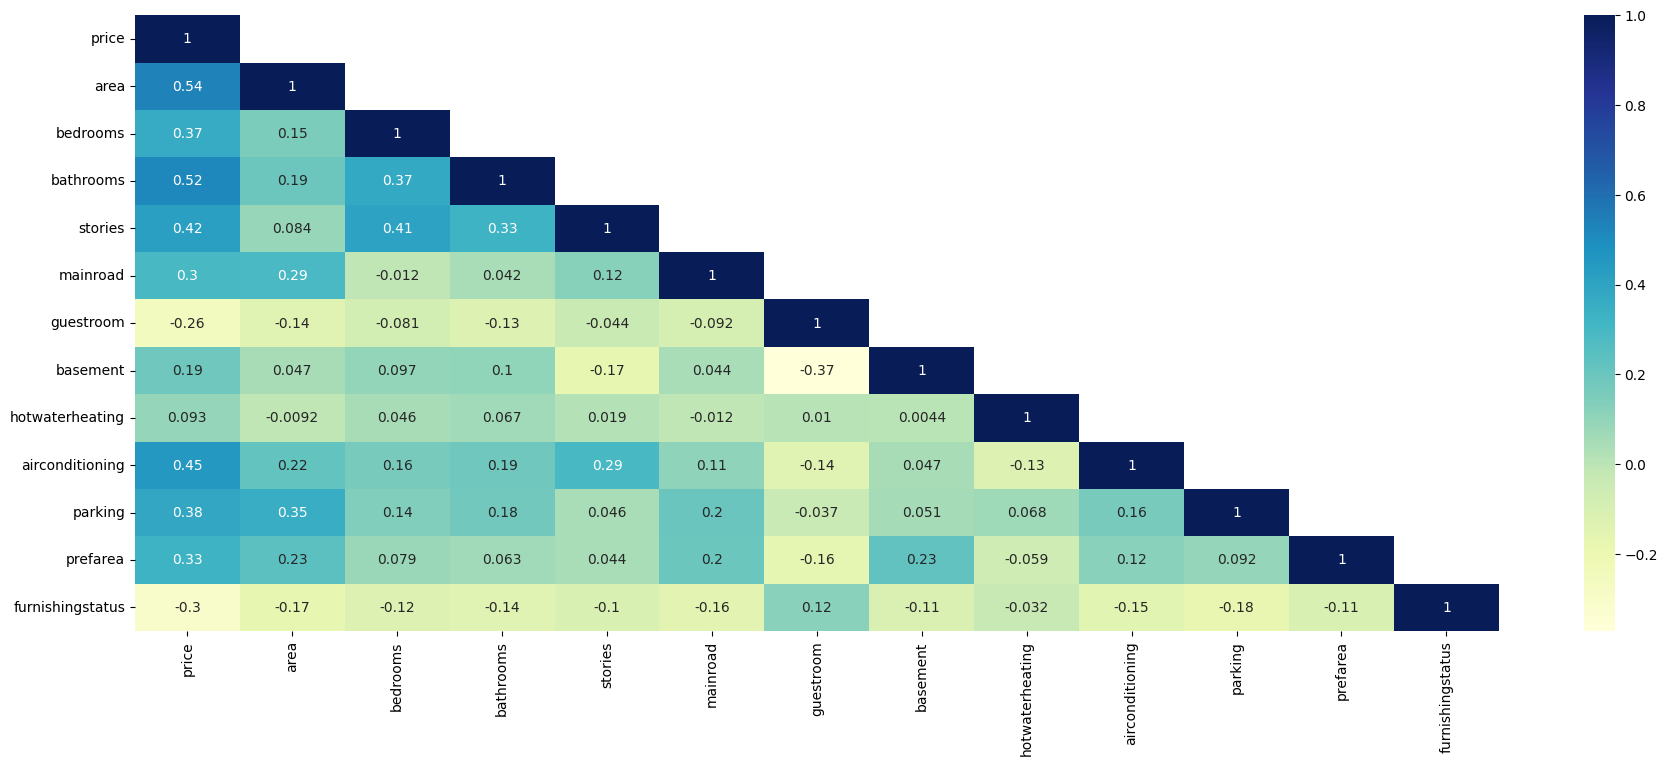

In [10]:
# Heatmap de correlación
plt.figure(figsize=(22,8))
corr_df = df.corr(method='pearson')
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmap = sns.heatmap(df_lt, cmap='YlGnBu', annot=True)

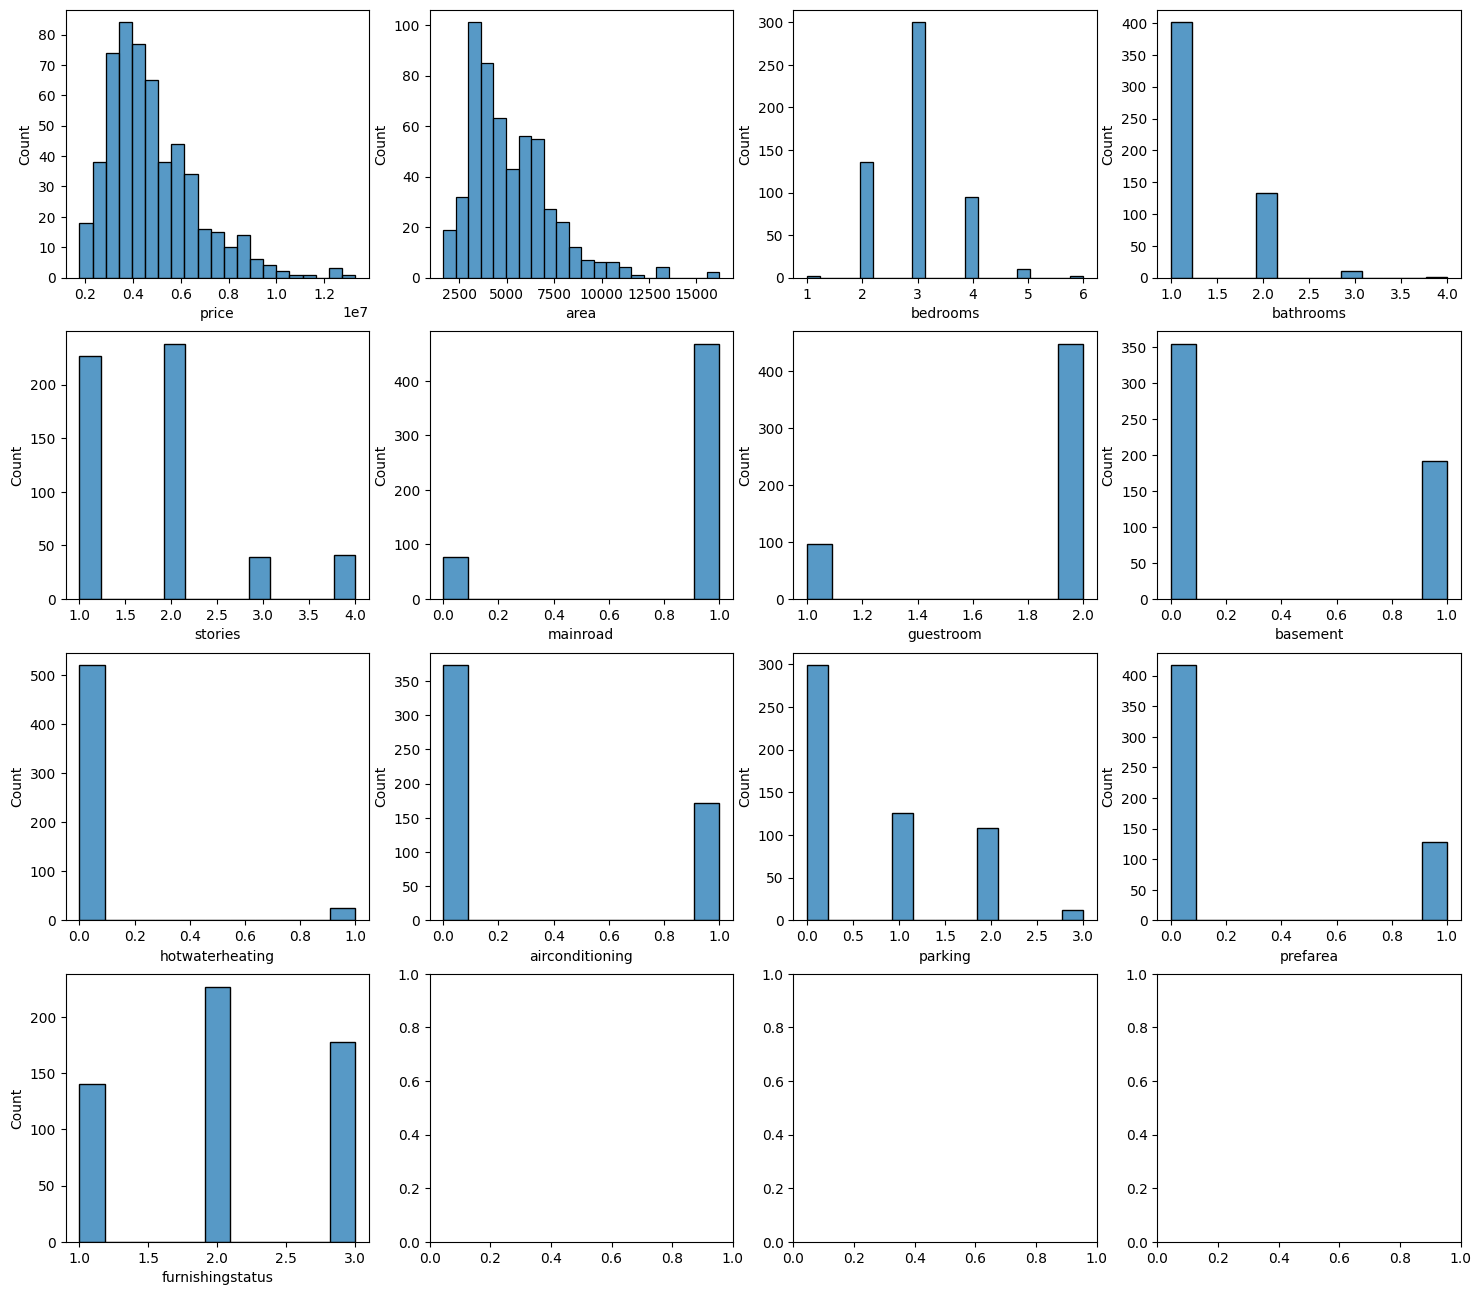

In [11]:
# Gráficas de distribución de las variables
columns = df.columns

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(18,16))

for i, column in enumerate(columns):
    sns.histplot(data=df[column], ax=ax[i//4, i%4], kde=False)

### Insights
- De las variables independientes, el área tiene una escala muy superior a la del resto de las variables numéricas 
- No hay variables con alta correlación, no hay multicolinealidad

## Análisis Bivariado

In [12]:
# Se puede hacer análisis por variables más bien lógicas
df.groupby(by='furnishingstatus').mean().T

furnishingstatus,1,2,3
price,5495696.00,4907524.23,4013831.46
area,5688.10,5166.34,4707.60
bedrooms,3.06,3.01,2.83
bathrooms,1.38,1.30,1.19
stories,1.94,1.80,1.70
mainroad,0.94,0.86,0.79
guestroom,1.76,1.82,1.88
basement,0.41,0.38,0.27
hotwaterheating,0.04,0.06,0.03
airconditioning,0.44,0.29,0.25


In [13]:
df.groupby(by='bedrooms').median().T

bedrooms,1,2,3,4,5,6
price,2712500.00,3535000.00,4620000.00,5250000.00,5582500.00,4791500.00
area,3710.00,4036.00,4830.00,5400.00,5350.00,3950.00
bathrooms,1.00,1.00,1.00,2.00,2.00,1.50
stories,1.00,1.00,2.00,2.00,2.00,2.00
mainroad,0.50,1.00,1.00,1.00,1.00,1.00
guestroom,2.00,2.00,2.00,2.00,2.00,2.00
basement,0.00,0.00,0.00,0.00,1.00,0.00
hotwaterheating,0.00,0.00,0.00,0.00,0.00,0.00
airconditioning,0.00,0.00,0.00,0.00,0.00,0.00
parking,0.00,0.00,0.00,1.00,0.00,0.50


In [14]:
df.groupby(by='bathrooms').median().T

bathrooms,1,2,3,4
price,3990000.00,6090000.00,7315000.00,12250000.00
area,4320.00,6000.00,5980.00,8960.00
bedrooms,3.00,3.00,4.00,4.00
stories,2.00,2.00,2.00,4.00
mainroad,1.00,1.00,1.00,1.00
guestroom,2.00,2.00,2.00,2.00
basement,0.00,0.00,0.50,0.00
hotwaterheating,0.00,0.00,0.00,0.00
airconditioning,0.00,0.00,0.00,1.00
parking,0.00,1.00,1.50,3.00


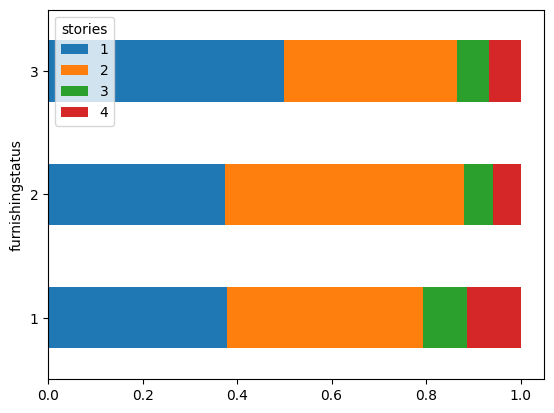

In [15]:
# Se puede hacer un análisis bivariado gráfico utilizando crosstab
ct = pd.crosstab(df['furnishingstatus'], df['stories'], normalize='index').plot.barh(stacked=True)

<AxesSubplot: ylabel='stories'>

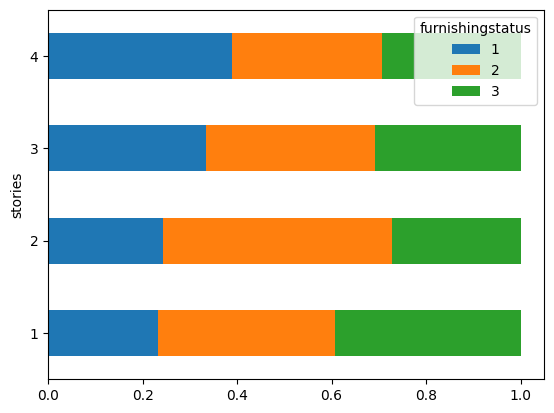

In [16]:
pd.crosstab(df['stories'], df['furnishingstatus'], normalize='index').plot.barh(stacked=True)

# Modelo de Regresión

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [18]:
# Construcción de los dataframes de X y Y para la regresión
# Variablees independientes
x = df.drop(columns=['price'])

# Variables dependientes
y = df['price']

In [19]:
# Dividir en training-testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)

In [20]:
# Ejecutar regresión lineal
# Construir el regresor
regression_model = LinearRegression()

# Generar el fit de la regresión con la función fit
regression_model.fit(X=x_train, y=y_train)

LinearRegression()

In [21]:
# Obtiene el coeficiente de regresión de entrenamiento (R2)
regression_model.score(x_train, y_train)        # Esto no se debe tomar como score real del modelo puesto que se está evaluando con los mismos datos con los que se entrenó el modelo, pero es buena referencia para la siguiente celda

0.6799674103626108

In [22]:
# Coeficiente de regresión con datos de testing
regression_model.score(x_test, y_test)      # Aquí ya se está evaluando el modelo con respecto a datos de testing

# Esto quiere decir que con el modelo de regresión se puede explicar un 66% de los resultados. Esto quiere decir que aproximadamente 66 de cada 100 predicciones van a ser correctas o muy próximas a la realidad

0.662117340196921

In [23]:
# Comparación de Predicción vs Actual
y_pred = regression_model.predict(x_test)
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
df_pred

,Actual,Predicted
62,7070000,6291567.11
247,4550000,6390833.35
142,5600000,6529768.58
107,6125000,5564502.05
483,2940000,4230599.25
...,...,...
450,3150000,4008865.09
542,1750000,2717347.44
408,3430000,2810959.56
80,6629000,5677214.47


---

In [24]:
# Otras medidas de modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = regression_model.predict(x_test)

# Suma absoluta de las diferencias (Mean absolute error)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
print(f'{mae:.2f}')

# Suma absoluta de las diferencias al cuadrado
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
print(f'{mse:.2f}')

# Entre más se acerquen los errores a 0, mejor. Para reducir el error se tienen que hacer afinaciones de hiper parámetro, cambiar el set de training/testing, cambiar las variables que toma el modelo, cambiar los dummies utilizados, etc.

855894.77
1375329793553.13


In [25]:
# Obtener los coeficientes de la ecuación
for idx, col_name in enumerate(x_train.columns):
    print("Coef {} = {}".format(col_name, regression_model.coef_[idx]))

Coef area = 246.3476871125192
Coef bedrooms = 47198.862725111656
Coef bathrooms = 1020173.2432420894
Coef stories = 525778.9633518044
Coef mainroad = 476712.9848125415
Coef guestroom = -275668.95076000574
Coef basement = 557956.2675518364
Coef hotwaterheating = 822714.5575357173
Coef airconditioning = 608777.0120530975
Coef parking = 274736.4499754941
Coef prefarea = 500668.03295517946
Coef furnishingstatus = -202462.66994588473


In [28]:
# Obtiene los coeficientes en un dataframe 
# Se usa para la funcion enumerate
# Tener en cuenta el uso de [0] ya que algunas variables vienen en arrays, para obtener el valor completo
coef_data = pd.DataFrame()

# Intercept
coef_data = coef_data.append({'Coef': regression_model.intercept_, 'Var': 'Intercept'}, ignore_index=True)

# Coeficientes
for idx, col_name in enumerate(x_train.columns):
    coef_data = coef_data.append({'Var':col_name, 'Coef': regression_model.coef_[idx]}, ignore_index=True)

coef_data

C:\Users\USER\AppData\Local\Temp\ipykernel_19240\3371462826.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coef_data = coef_data.append({'Coef': regression_model.intercept_, 'Var': 'Intercept'}, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_19240\3371462826.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coef_data = coef_data.append({'Var':col_name, 'Coef': regression_model.coef_[idx]}, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_19240\3371462826.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coef_data = coef_data.append({'Var':col_name, 'Coef': regression_model.coef_[idx]}, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_19240\3371462826.py:11: FutureWarning: 

,Coef,Var
0,867231.80,Intercept
1,246.35,area
2,47198.86,bedrooms
3,1020173.24,bathrooms
4,525778.96,stories
5,476712.98,mainroad
6,-275668.95,guestroom
7,557956.27,basement
8,822714.56,hotwaterheating
9,608777.01,airconditioning


In [30]:
# Ecuación del fit

equation = 'Price'
print(equation, end='\t')
for i in range(0,13):
    if (i!=12):
        print('(', coef_data.iloc[i].Coef,')', '*', coef_data.iloc[i].Var, '+', end='   \n')
    else:
        print(coef_data.iloc[i].Coef)

Price	( 867231.8029170744 ) * Intercept +   
( 246.3476871125192 ) * area +   
( 47198.862725111656 ) * bedrooms +   
( 1020173.2432420894 ) * bathrooms +   
( 525778.9633518044 ) * stories +   
( 476712.9848125415 ) * mainroad +   
( -275668.95076000574 ) * guestroom +   
( 557956.2675518364 ) * basement +   
( 822714.5575357173 ) * hotwaterheating +   
( 608777.0120530975 ) * airconditioning +   
( 274736.4499754941 ) * parking +   
( 500668.03295517946 ) * prefarea +   
-202462.66994588473


Text(0.5, 1.0, 'Comparación de Predicción (x) y Real (y)')

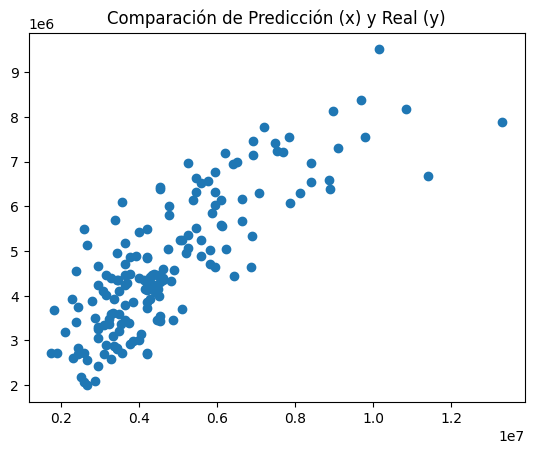

In [32]:
# Comparación de las predicciones con los reales
predictions = regression_model.predict(x_test)
plt.scatter(y_test, predictions)
plt.title('Comparación de Predicción (x) y Real (y)')

Text(0.5, 1.0, 'Residuals')

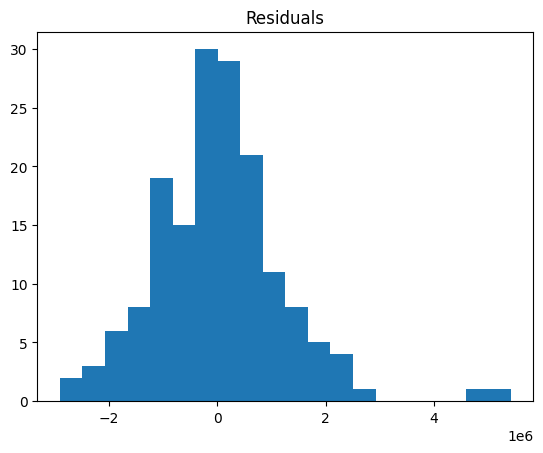

In [34]:
# Generación de residuales
# Que según las premisas, debería tener la forma de una distribución normal
plt.hist(y_test - predictions, bins=20)
plt.title('Residuals')

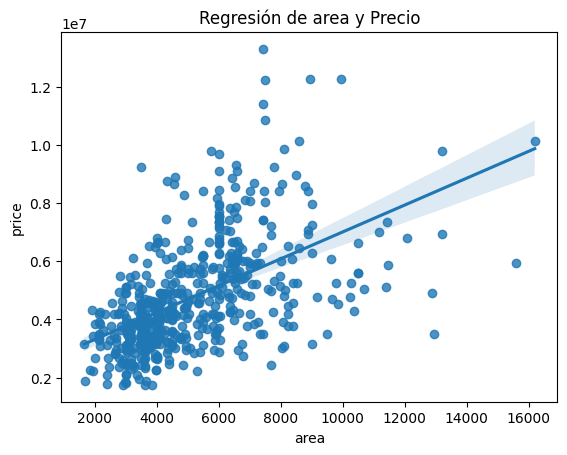

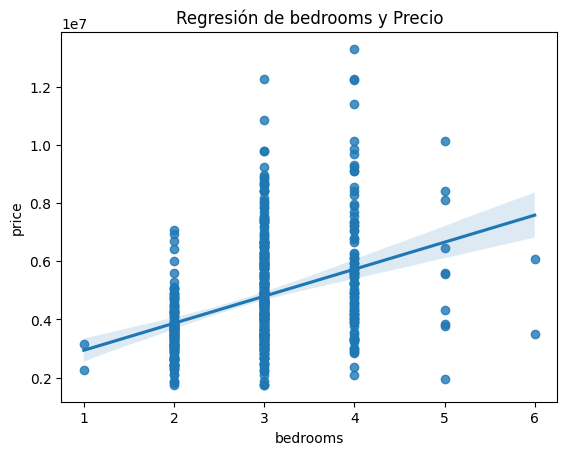

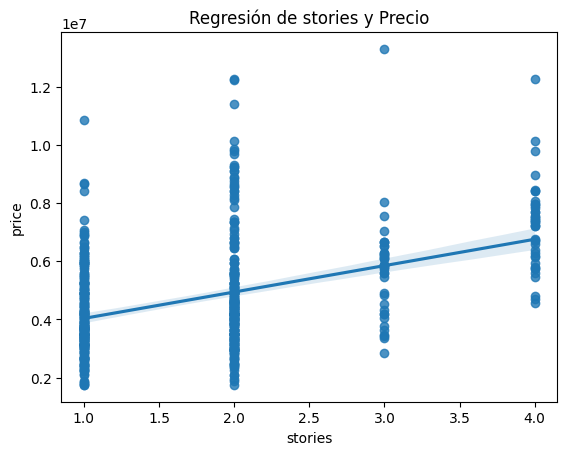

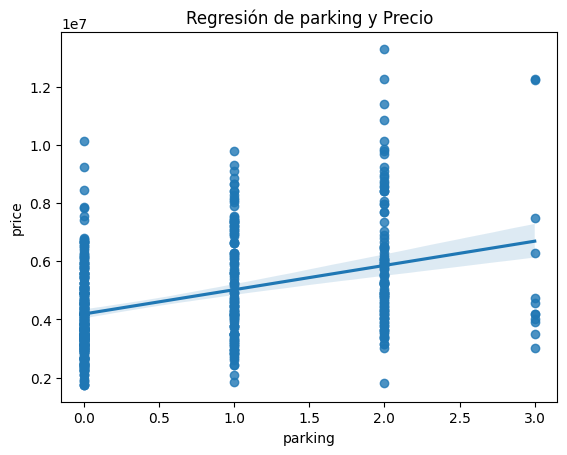

In [35]:
# Visualización de algunas variables presentes en la regresión
# Ref: https://seaborn.pydata.org/tutorial/regression.html

# Esto muestra las variables que tienen rango (area) versus el precio
# Las demás variables son discretas
variables = ['area', 'bedrooms', 'stories' ,'parking']
for var in variables:
    plt.figure()
    sns.regplot(x=var, y='price', data=df).set(title=f'Regresión de {var} y Precio')

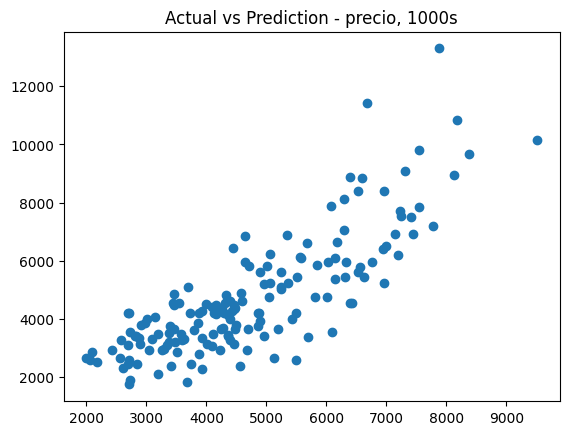

In [41]:
# Scatter de predicciones vs real
fig, ax = plt.subplots()
ax.ticklabel_format(style='plain')
plt.title('Actual vs Prediction - precio, 1000s')
plt.scatter(y_pred / 1000, y_test / 1000)

### Wrap up:
- Se generó un primer modelo de regresión lineal
- Se genera la ecuación de la regresión
- Se visualiza los resultados entre lo predicho y lo real